### Thinking About Model Validation

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [3]:
model.fit(X,y)
y_model = model.predict(X)

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

__That was bad model validation - using the same train data as the validation__

#### Model validation the right way: Holdout sets

In [5]:
from sklearn.cross_validation import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                 train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate model
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.90666666666666662

#### Model validation via cross-validation

In [6]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)

accuracy_score(y2, y2_model), accuracy_score(y1, y1_model)

(0.90666666666666662, 0.95999999999999996)

*The above is a 2-fold cross validation*

__For a 5-fold validation__

In [8]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
scores

array([ 0.96666667,  0.96666667,  0.93333333,  0.93333333,  1.        ])

In [11]:
# for leave one out
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [12]:
scores.mean()

0.95999999999999996

### Selecting the Best Model

#### The Bias Variance Trade-off

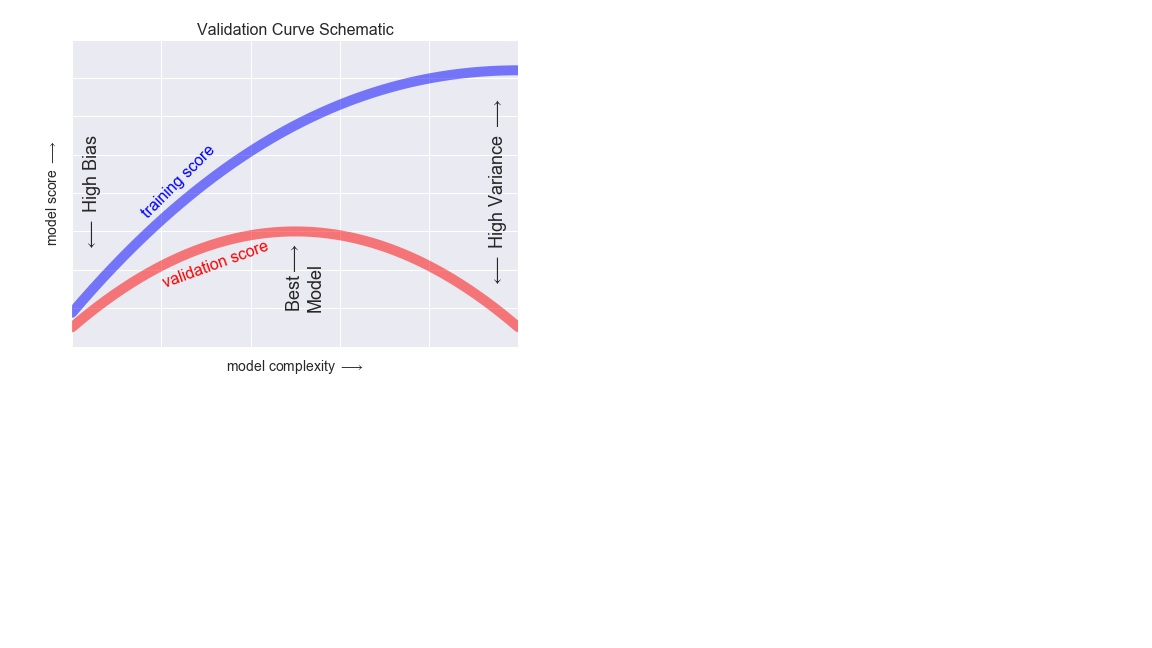

In [15]:
from IPython.display import Image
Image('bias-var.jpg')

#### Validation curves in scikit-learn

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))


In [2]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1./(X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X,y

X, y = make_data(40)


Let's visualize

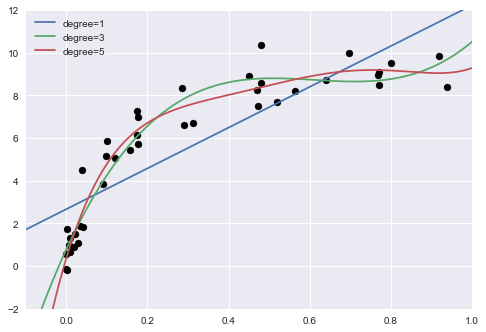

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='k')
#axis = plt.axis()

for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
    
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

how to tune:
Given a model, data, parameter name, and a
range to explore, this function will automatically compute both the training score and validation score across the range

In [30]:
from sklearn.model_selection import validation_curve
degree =  np.arange(0, 21)

train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                        'polynomialfeatures__degree',
                                        degree, cv=7)

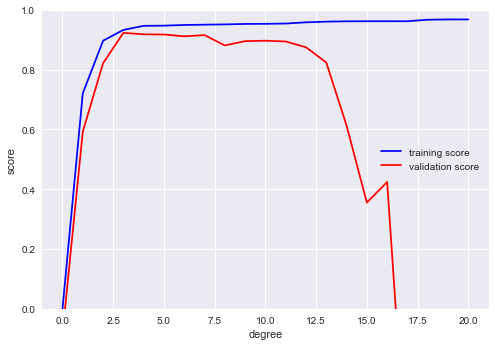

In [31]:
plt.plot(degree, np.median(train_score, 1), color='b', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')

__here we see the optimum is from the third order polynomial__

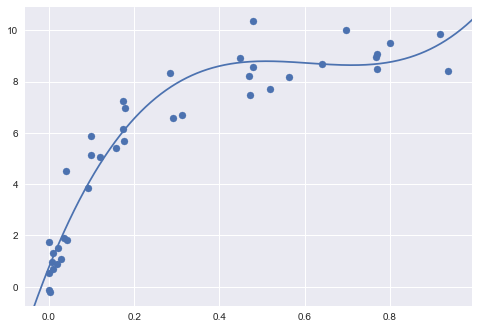

In [36]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

### Learning Curves

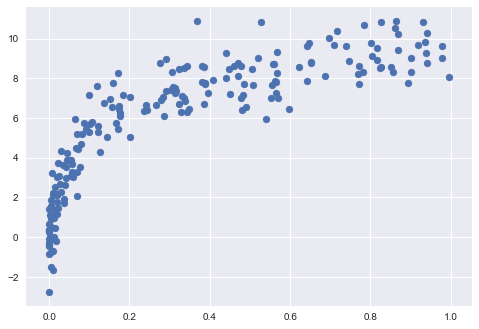

In [37]:
# let's get more data(x5)
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

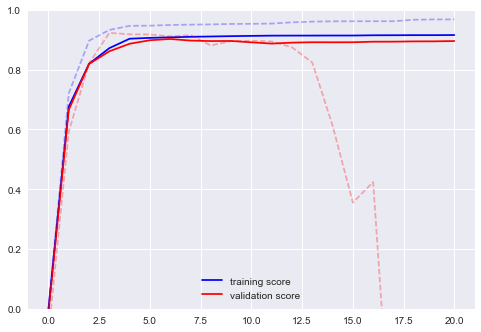

In [50]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), 
                                            X2, y2, 'polynomialfeatures__degree', 
                                            degree, cv=7)

plt.plot(degree, np.median(train_score2,1), color = 'b', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='r', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='b', alpha=0.3,
        linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), alpha=0.3, color='r', ls='--')

plt.legend(loc='lower center')
plt.ylim(0,1);

__we see that the behavior of the validation curve has not one, but two, important inputs: the model complexity and the number of training points__

#### Learning  curves in Scikit-Learn

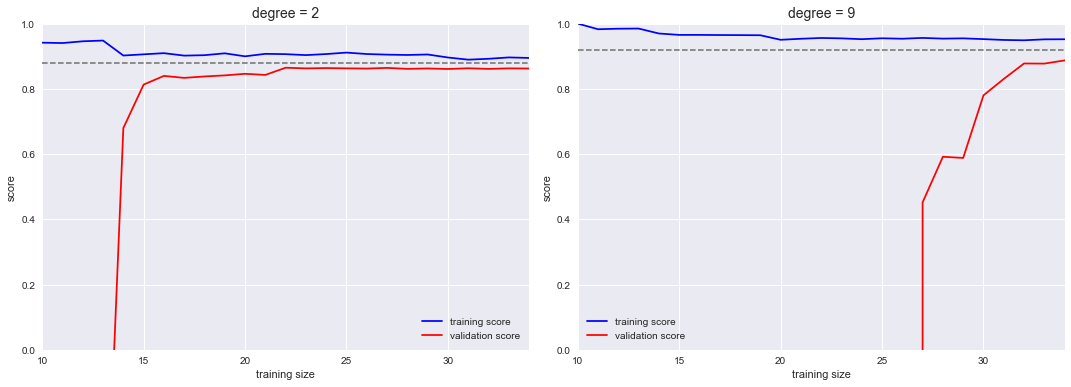

In [64]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                        X, y, cv=7,
                                        train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='b', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='r', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',
                 linestyle='--')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

### Validation in Practice: Grid Search

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
             'linearregression__fit_intercept': [True, False],
             'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [76]:
grid.fit(X, y);

In [77]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

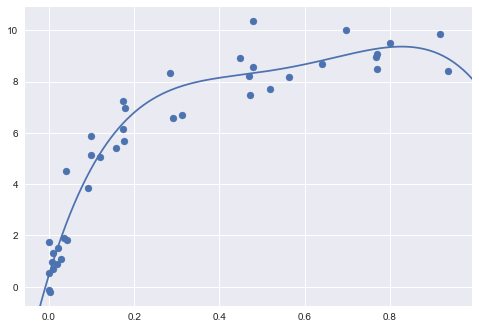

In [82]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()  # good to do this to keep the axis parameters
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim);